In [127]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sidetable as stb
from sklearn import metrics

In [128]:
df_train = pd.read_csv("data/train.csv")

In [3]:
df_train.shape

(42000, 785)

In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.stb.missing()

,missing,total,percent
label,0,42000,0.0
pixel515,0,42000,0.0
pixel517,0,42000,0.0
pixel518,0,42000,0.0
pixel519,0,42000,0.0
...,...,...,...
pixel263,0,42000,0.0
pixel264,0,42000,0.0
pixel265,0,42000,0.0
pixel266,0,42000,0.0


In [6]:
df_train.isna().sum().sum()

0

In [7]:
df_train["label"].nunique()

10

In [8]:
sorted(df_train["label"].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
X = df_train.iloc[:, 1:]

In [10]:
y = df_train.iloc[:, 0]
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [11]:
kernels = []

In [12]:
from sklearn import svm

In [13]:
#clf = svm.SVC(decision_function_shape='ovo')

In [14]:
#clf.fit(X, y)

In [15]:
#lin_clf = svm.LinearSVC(max_iter=10000)

In [16]:
#lin_clf.fit(X, y)

In [17]:
#lin_clf.classes_

In [18]:
#preds = lin_clf.predict(df_train.iloc[1001:2000,1:])

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
#accuracy_score(df_train.iloc[1001:2000, 0], preds)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(X)

MinMaxScaler()

In [24]:
X_scaled = scaler.transform(X)

In [25]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [26]:
X_scaled.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
clf = svm.SVC(decision_function_shape='ovr')

In [51]:
clf.fit(X_scaled.iloc[:5000, :], y[:5000])

SVC()

In [52]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
preds = clf.predict(X_scaled.iloc[5001:10000,:])

In [54]:
accuracy_score(df_train.iloc[5001:10000, 0], preds)

0.9505901180236047

In [55]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [57]:
print(f"Classification report for classifier :\n"
      f"{metrics.classification_report(df_train.iloc[5001:10000, 0], preds)}\n")

Classification report for classifier :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       497
           1       0.97      0.98      0.98       537
           2       0.95      0.94      0.94       500
           3       0.95      0.94      0.94       529
           4       0.95      0.96      0.95       490
           5       0.92      0.95      0.94       437
           6       0.96      0.97      0.97       487
           7       0.97      0.92      0.95       533
           8       0.95      0.93      0.94       472
           9       0.93      0.93      0.93       517

    accuracy                           0.95      4999
   macro avg       0.95      0.95      0.95      4999
weighted avg       0.95      0.95      0.95      4999




Confusion matrix:
[[487   0   0   0   2   0   3   0   5   0]
 [  0 528   2   2   1   1   1   0   1   1]
 [  4   3 471   5   6   1   3   5   1   1]
 [  1   2   6 495   0  13   2   0   6   4]
 [  1   3   0   0 469   0   3   0   1  13]
 [  3   0   1   7   1 416   5   0   4   0]
 [  5   0   0   0   1   8 472   0   1   0]
 [  2   4  13   2   7   0   0 493   0  12]
 [  2   4   3   6   0   7   1   3 441   5]
 [  2   2   1   6   9   4   1   7   5 480]]


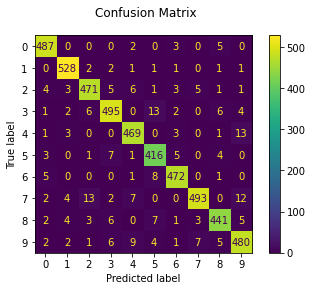

In [58]:
disp = metrics.plot_confusion_matrix(clf, X_scaled.iloc[5001:10000,:], df_train.iloc[5001:10000, 0])
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [76]:
df_train.shape

(42000, 785)

In [104]:
X = df_train.iloc[:10000, 1:]
y = df_train.iloc[:10000, 0]

In [105]:
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]

In [85]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [108]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [110]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)X = X_scaled

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [112]:
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [113]:
y_test.shape

(2000, 10)

In [114]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [115]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [116]:
tpr

{0: array([0.        , 0.00490196, 0.7745098 , 0.7745098 , 0.9754902 ,
        0.9754902 , 0.98039216, 0.98039216, 0.99019608, 0.99019608,
        0.99509804, 0.99509804, 1.        , 1.        ]),
 1: array([0.        , 0.00452489, 0.98190045, 0.98190045, 0.98642534,
        0.98642534, 0.99095023, 0.99095023, 0.99547511, 0.99547511,
        1.        , 1.        ]),
 2: array([0.        , 0.00578035, 0.83236994, 0.83236994, 0.85549133,
        0.85549133, 0.87861272, 0.87861272, 0.88439306, 0.88439306,
        0.89017341, 0.89017341, 0.9132948 , 0.9132948 , 0.93063584,
        0.93063584, 0.94219653, 0.94219653, 0.94797688, 0.94797688,
        0.95375723, 0.95375723, 0.95953757, 0.95953757, 0.96531792,
        0.96531792, 0.97109827, 0.97109827, 0.97687861, 0.97687861,
        0.98265896, 0.98265896, 0.98843931, 0.98843931, 0.99421965,
        0.99421965, 1.        , 1.        ]),
 3: array([0.        , 0.00458716, 0.81651376, 0.81651376, 0.85321101,
        0.85321101, 0.86697248, 0.

In [117]:
n_classes

10

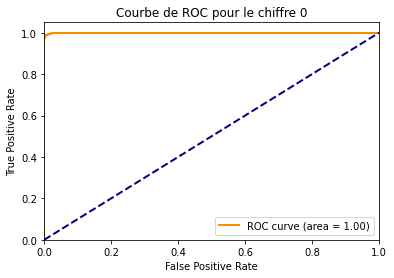

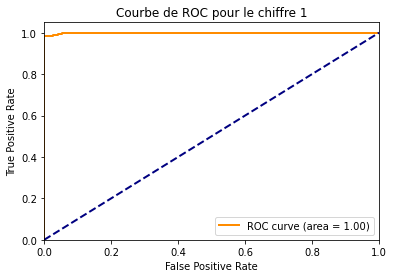

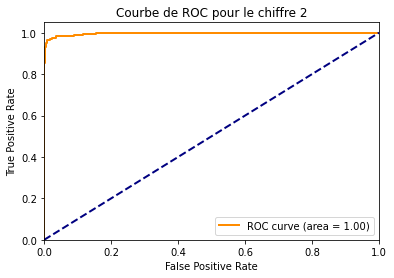

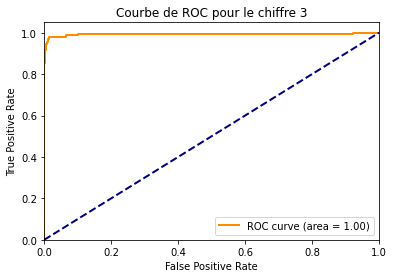

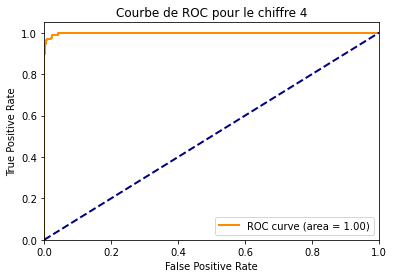

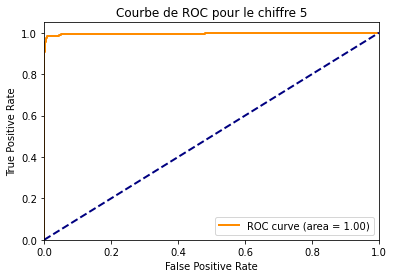

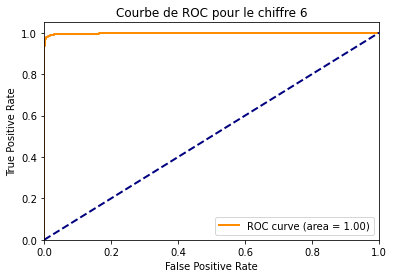

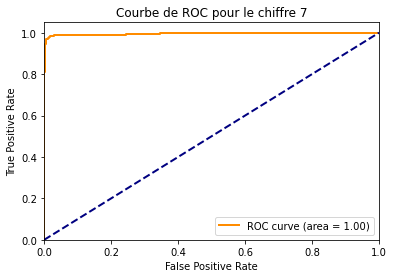

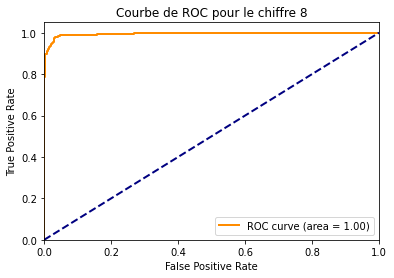

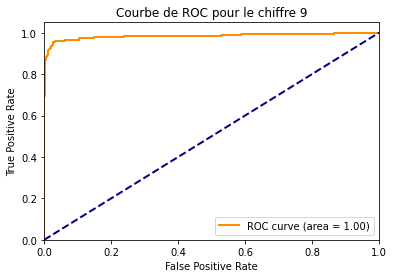

In [118]:
for i in range(n_classes):
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Courbe de ROC pour le chiffre {i}')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
preds = classifier.predict(X_test)
accuracy_score(y_test, preds)

In [129]:
from sklearn.svm import SVC

In [130]:
X = df_train.iloc[:10000, 1:]
y = df_train.iloc[:10000, 0]

In [131]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [136]:
clf = SVC()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accuracy_score(y_test, preds)

0.9575

In [138]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [141]:
clf = SVC(C=10)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
accuracy_score(y_test, preds)

0.9685